# Lecture: Image Filtering

## Section 1: Preparation

### Install the libraries

In [1]:
# Import the libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import pyrealsense2 as rs2
import cv2


### Capture an image using realsense camera

In [2]:
pipeline = rs2.pipeline()
config = rs2.config()

config.enable_stream(rs2.stream.color, 640, 480, rs2.format.bgr8, 30)
config.enable_stream(rs2.stream.depth, 640, 480, rs2.format.z16, 30)

pipeline.start(config)

# Display the livestream
while True:
    frame = pipeline.wait_for_frames()
    color_frame = frame.get_color_frame()

    color_image = np.asanyarray(color_frame.get_data())

    cv2.imshow("Captured Image", color_image)

    if cv2.waitKey(1) == ord('q'):
        break

cv2.imwrite('photo.jpg', color_image)

cv2.destroyAllWindows()

pipeline.stop()


## Section 2: Pixel-wise Filtering

### Pixel value of an image

The raw numpy array: 


array([[[ 89, 174, 211],
        [ 84, 174, 211],
        [ 75, 171, 209],
        ...,
        [ 68,  87,  94],
        [ 64,  85,  90],
        [ 65,  86,  91]],

       [[ 90, 178, 216],
        [ 82, 174, 211],
        [ 79, 177, 216],
        ...,
        [ 69,  86,  93],
        [ 66,  85,  91],
        [ 68,  87,  93]],

       [[ 88, 182, 220],
        [ 79, 175, 215],
        [ 76, 175, 216],
        ...,
        [ 71,  86,  91],
        [ 71,  86,  91],
        [ 72,  87,  92]],

       ...,

       [[253, 236, 208],
        [255, 239, 211],
        [255, 241, 213],
        ...,
        [ 30,  43,  52],
        [ 37,  52,  59],
        [ 44,  59,  66]],

       [[251, 227, 199],
        [248, 224, 196],
        [248, 224, 196],
        ...,
        [ 46,  59,  67],
        [ 47,  62,  69],
        [ 47,  64,  71]],

       [[228, 201, 174],
        [226, 199, 172],
        [229, 202, 175],
        ...,
        [ 50,  63,  71],
        [ 44,  59,  66],
        [ 40,  57,  64]]

The captured image


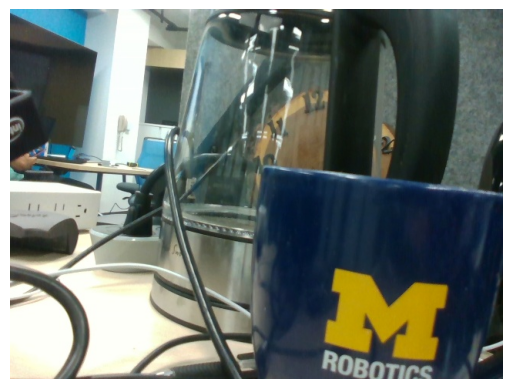

In [3]:
# Load the image
try:
    img = Image.open('photo.jpg')
    img_array = np.array(img)
    # Split the image into RGB channels
    if img_array.shape[-1] != 3: # Check if the image has 3 channels (RGB)
      print("Error: The image does not appear to be an RGB image.")
    print("The raw numpy array: ")
    display(img_array)

    print("The captured image")
    plt.axis("off")
    plt.imshow(img_array)


except FileNotFoundError:
    print("Error: The file photo.jpg was not found. Please make sure to capture an image first.")
except Exception as e:
    print(f"An error occurred: {e}")

In [4]:
%matplotlib tk
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig = plt.figure(figsize=(20,30))

img=mpimg.imread('photo.jpg')

def onclick(event):
    ix, iy = event.xdata, event.ydata
    print("Clicked point at: (%f, %f)"%(ix,iy))
    r, g, b = img[int(ix)][int(iy)]
    print("RGB Channel at the clicked point: (%i, %i, %i)"%(r,g,b))

cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.axis("off")
imgplot = plt.imshow(img)
plt.show()

### RGB Channels of an image

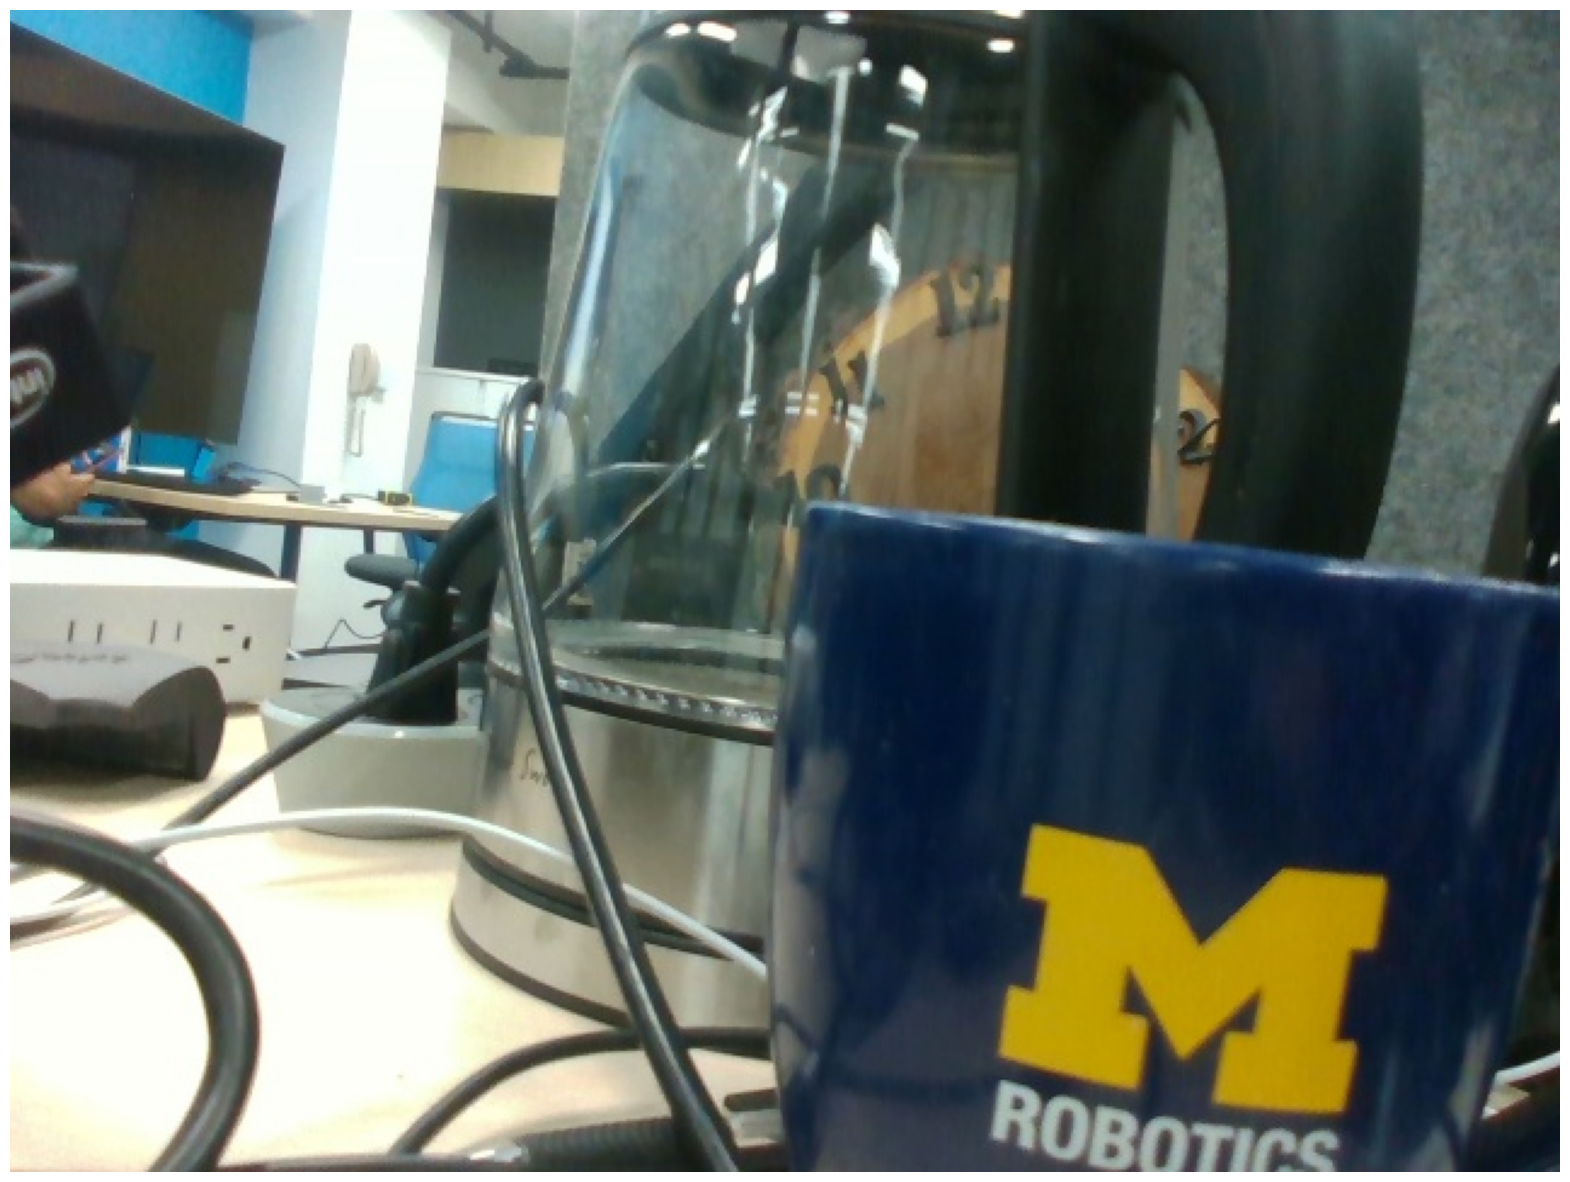

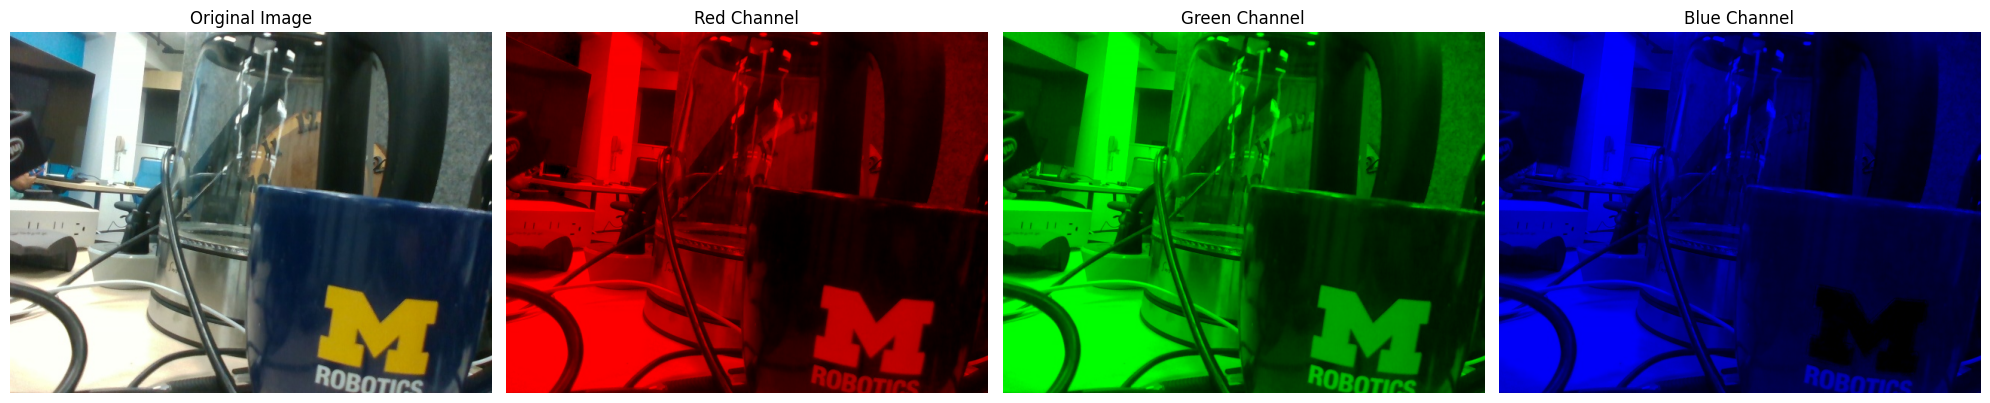

In [5]:
%matplotlib inline
# R, G, B channels of the image
r_channel = np.zeros_like(img_array)
g_channel = np.zeros_like(img_array)
b_channel = np.zeros_like(img_array)

# Split the image into RGB channels
r_channel[:, :, 0] = img_array[:, :, 0]
g_channel[:, :, 1] = img_array[:, :, 1]
b_channel[:, :, 2] = img_array[:, :, 2]

# Create a figure and axes for displaying the images
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Display the original image
axes[0].imshow(img_array)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display the Red channel
axes[1].imshow(r_channel)
axes[1].set_title('Red Channel')
axes[1].axis('off')

# Display the Green channel
axes[2].imshow(g_channel)
axes[2].set_title('Green Channel')
axes[2].axis('off')

# Display the Blue channel
axes[3].imshow(b_channel)
axes[3].set_title('Blue Channel')
axes[3].axis('off')

plt.tight_layout()
plt.show()



### Pixel-wise Filtering

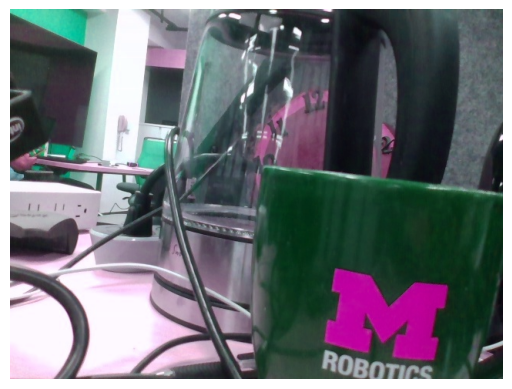

In [6]:
# Switch the green & blue channel
img_array2 = img_array.copy()
img_array2[:, :, [1, 2]] = img_array[:, :, [2, 1]]
plt.axis("off")
plt.imshow(img_array2)
plt.show()

In [7]:
# Select the channel value range
from ipywidgets import IntRangeSlider, interact

# Create a double-ended integer slider
r_range_slider = IntRangeSlider(
    min=0,
    max=255,
    step=1,
    description='Select red-channel Range:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format=',d',
)

# Display the slider
display(r_range_slider)

g_range_slider = IntRangeSlider(
    min=0,
    max=255,
    step=1,
    description='Select green-channel Range:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format=',d',
)

# Display the slider
display(g_range_slider)

b_range_slider = IntRangeSlider(
    min=0,
    max=255,
    step=1,
    description='Select blue-channel Range:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format=',d',
)

# Display the slider
display(b_range_slider)

IntRangeSlider(value=(63, 191), continuous_update=False, description='Select red-channel Range:', max=255, rea…

IntRangeSlider(value=(63, 191), continuous_update=False, description='Select green-channel Range:', max=255, r…

IntRangeSlider(value=(63, 191), continuous_update=False, description='Select blue-channel Range:', max=255, re…

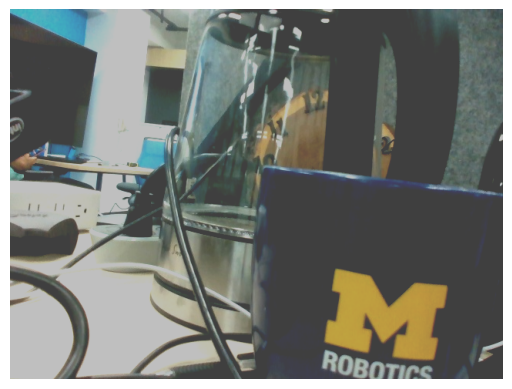

In [8]:
# Keep only the rgb values only within the range
# Extract the thresholds
r_min = r_range_slider.value[0]
r_max = r_range_slider.value[1]
g_min = g_range_slider.value[0]
g_max = g_range_slider.value[1]
b_min = b_range_slider.value[0]
b_max = b_range_slider.value[1]
img_array_clip = img_array.copy()
img_array_clip[:, :, 0] = np.clip(img_array[:, :, 0], r_min, r_max)
img_array_clip[:, :, 1] = np.clip(img_array[:, :, 1], g_min, g_max)
img_array_clip[:, :, 2] = np.clip(img_array[:, :, 2], b_min, b_max)
plt.axis("off")
plt.imshow(img_array_clip)
plt.show()

## Section 3: Spatial Filtering

### Define the filtering function

In [ ]:
# Define the formal filtering function
def filter_image(img_array, kernel):
  # Assume a gray-scale image
  assert len(img_array.shape) == 2, "Assume a grayscale image so far"

  H, W = img_array.shape
  kh, kw = kernel.shape

  img_array_filtered = np.zeros((H - kh + 1, W - kw + 1))

  for i in range(H - kh + 1):
    for j in range(W - kw + 1):
      img_array_filtered[i, j] = np.sum(img_array[i:i+kh, j:j+kw] * kernel)
      
  return img_array_filtered



### Let's see the examples on a simple matrix

In [10]:
sample_matrix = np.array([
    [2, 1, 4, 4, 7],
    [1, 2, 2, 3, 6],
    [3, 3, 5, 8, 9],
    [5, 2, 2, 6, 7],
    [8, 3, 2, 1, 3]
])
print("Sample matrix: ")
print(sample_matrix)
# identity
kernel = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
])
print("Output after applied Identity kernel: ")
print(filter_image(sample_matrix, kernel))

# shifting
kernel = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [0, 0, 0]
])
print("Output after applied Shifting kernel: ")
print(filter_image(sample_matrix, kernel))

# box (moving average)
kernel = (1/9) * np.ones((3, 3))
print("Output after applied Box kernel: ")
print(filter_image(sample_matrix, kernel))

# directional blur
kernel = (1/3) * np.array([
    [0, 0, 0],
    [1, 1, 1],
    [0, 0, 0]
])
print("Output after applied Directional blur kernel: ")
print(filter_image(sample_matrix, kernel))

kernel = (1/3) * np.array([
    [1, 0, 0],
    [1, 0, 0],
    [1, 0, 0]
])
print(filter_image(sample_matrix, kernel))

Sample matrix: 
[[2 1 4 4 7]
 [1 2 2 3 6]
 [3 3 5 8 9]
 [5 2 2 6 7]
 [8 3 2 1 3]]
Output after applied Identity kernel: 
[[2. 2. 3.]
 [3. 5. 8.]
 [2. 2. 6.]]
Output after applied Shifting kernel: 
[[1. 2. 2.]
 [3. 3. 5.]
 [5. 2. 2.]]
Output after applied Box kernel: 
[[2.55555556 3.55555556 5.33333333]
 [2.77777778 3.66666667 5.33333333]
 [3.66666667 3.55555556 4.77777778]]
Output after applied Directional blur kernel: 
[[1.66666667 2.33333333 3.66666667]
 [3.66666667 5.33333333 7.33333333]
 [3.         3.33333333 5.        ]]
[[2.         2.         3.66666667]
 [3.         2.33333333 3.        ]
 [5.33333333 2.66666667 3.        ]]


## More advanced filters

### Convert the original image into a grayscale image for simplicity

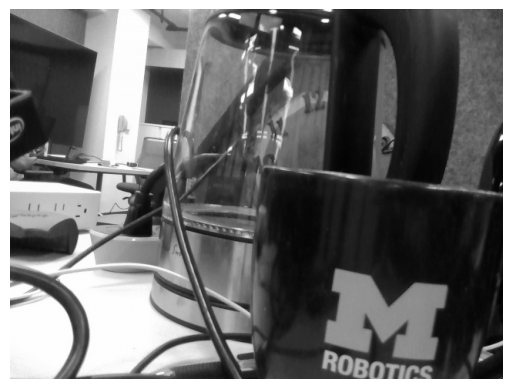

In [11]:
# Convert the image into gray-scale format
img = Image.open('photo.jpg')
# Convert the image to grayscale
img_gray = img.convert('L')

# Convert the grayscale image back to a NumPy array for display
img_gray_array = np.array(img_gray)

plt.axis("off")
plt.imshow(img_gray_array, cmap="gray")
plt.show()

### Define the Gaussian filter

In [12]:
# Define the Gaussian filter
def create_gaussian_kernel(size, sigma=1):
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return kernel / (2 * np.pi * sigma**2) # Replace the original normalization constant
def visualize_gaussian_kernel(kernel):
    plt.close()
    plt.imshow(kernel, cmap='jet', interpolation='nearest')
    plt.colorbar()
    plt.title('Gaussian Kernel')
    plt.show()

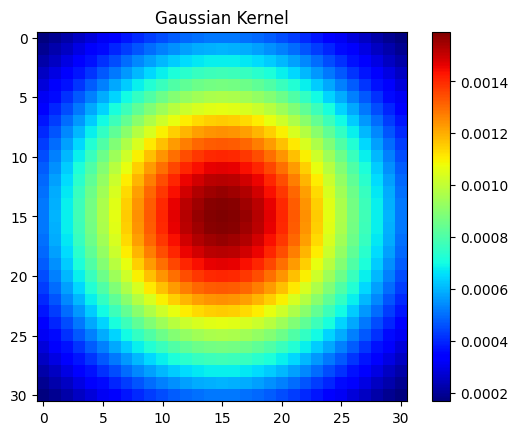

In [13]:
# Visualize the Gaussian filter
kernel_size = 31
sigma = 10
gaussian_kernel = create_gaussian_kernel(kernel_size, sigma)
visualize_gaussian_kernel(gaussian_kernel)

Gaussian blurring at level 1: 


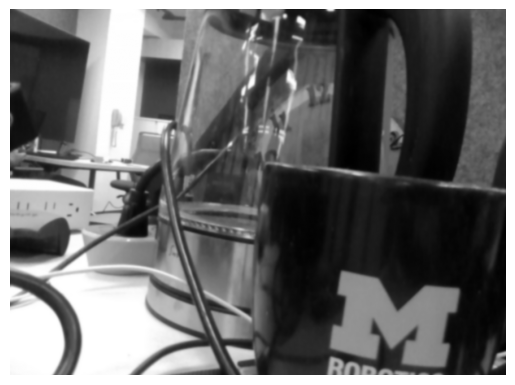

Gaussian blurring at level 2: 


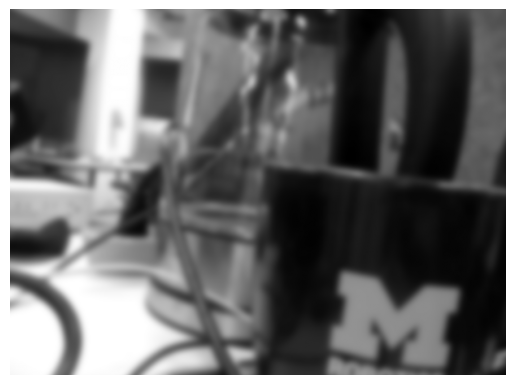

Gaussian blurring at level 3: 


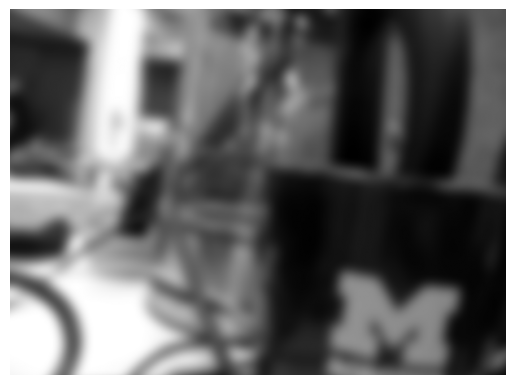

In [19]:
# Apply Gaussian filter on the original image
sigma = 1
gaussian_kernel = create_gaussian_kernel(kernel_size, sigma)
img_gray_array_filtered = filter_image(img_gray_array, gaussian_kernel)
print("Gaussian blurring at level 1: ")
plt.axis("off")
plt.imshow(img_gray_array_filtered, cmap="gray")
plt.show()

sigma = 4
gaussian_kernel = create_gaussian_kernel(kernel_size, sigma)
img_gray_array_filtered = filter_image(img_gray_array, gaussian_kernel)
print("Gaussian blurring at level 2: ")
plt.axis("off")
plt.imshow(img_gray_array_filtered, cmap="gray")
plt.show()


sigma = 7
gaussian_kernel = create_gaussian_kernel(kernel_size, sigma)
img_gray_array_filtered = filter_image(img_gray_array, gaussian_kernel)
print("Gaussian blurring at level 3: ")
plt.axis("off")
plt.imshow(img_gray_array_filtered, cmap="gray")
plt.show()


### Image Sharpening

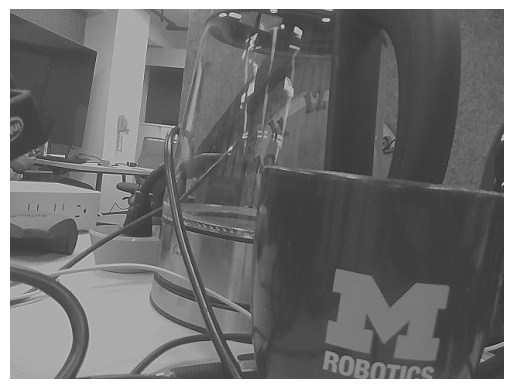

In [20]:
# Define a sharpening kernel
sharpening_kernel = np.array([
    [ 0, -1,  0],
    [-1,  5, -1],
    [ 0, -1,  0]
])

img_gray_array_filtered = filter_image(img_gray_array, sharpening_kernel)

plt.axis("off")
plt.imshow(img_gray_array_filtered, cmap="gray")
plt.show()


### Image sharpening as a deblurring tool

Gaussian blurring at level 1: 


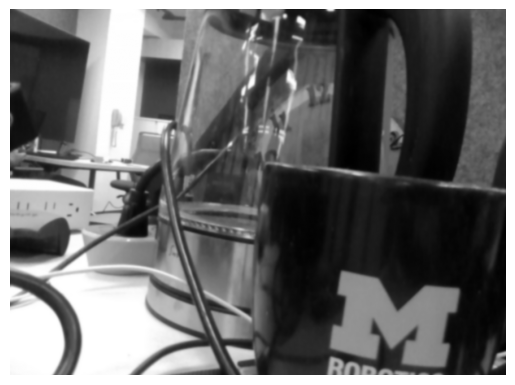

Effects after applying the sharpening filter


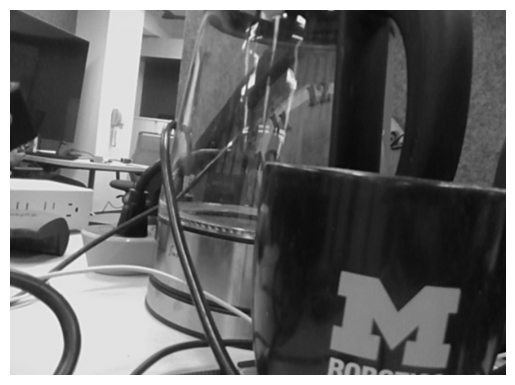

In [29]:
# Try the sharpening filter on the previously blurred image
sigma = 1
gaussian_kernel = create_gaussian_kernel(kernel_size, sigma)
img_gray_array_filtered = filter_image(img_gray_array, gaussian_kernel)

print("Gaussian blurring at level 1: ")
plt.axis("off")
plt.imshow(img_gray_array_filtered, cmap="gray")
plt.show()


img_gray_array_recovered = filter_image(img_gray_array_filtered, sharpening_kernel)
print("Effects after applying the sharpening filter")
plt.axis("off")
plt.imshow(img_gray_array_recovered, cmap="gray")
plt.show()


### Edge detection via Gradient

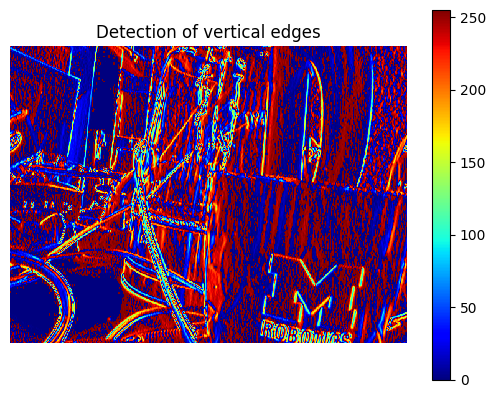

In [30]:
# Differentiation
vertical_edge_kernel = np.array([
    [ -1, 0,  1],
    [-1,  0, 1],
    [ -1, 0,  1]
])

img_gray_array_filtered = filter_image(img_gray_array, vertical_edge_kernel)
img_gray_array_filtered = img_gray_array_filtered.astype(np.uint8)
plt.close()

plt.axis("off")
plt.imshow(img_gray_array_filtered, cmap='jet', interpolation='nearest')
plt.colorbar()
plt.title('Detection of vertical edges')
plt.show()



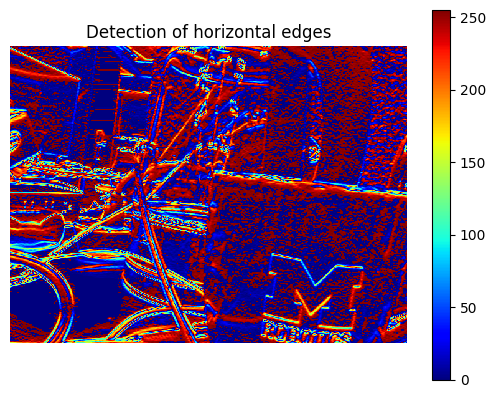

In [31]:
horizontal_edge_kernel = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])
img_gray_array_filtered = filter_image(img_gray_array, horizontal_edge_kernel)
img_gray_array_filtered = img_gray_array_filtered.astype(np.uint8)
plt.close()
plt.axis("off")
plt.imshow(img_gray_array_filtered, cmap='jet', interpolation='nearest')
plt.colorbar()
plt.title('Detection of horizontal edges')
plt.show()